<a href="https://colab.research.google.com/github/DennisGabriel-Dev/Estudo-de-caso-AM/blob/main/Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

### Carregando a base

In [ ]:
df = pd.read_csv('heart.csv')

### Pré-processamento

In [ ]:
for col in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

### Separar features e target

In [ ]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

### Padronizar os dados

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Separar treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Aplicando KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN:\n", classification_report(y_test, y_pred_knn))

KNN:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



### Aplicando SVM

In [ ]:
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM:\n", classification_report(y_test, y_pred_svm))

SVM:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



### Aplicando Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

Random Forest:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.90      0.90      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



### Aplicando regressão logística

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



### Aplicando K-means (Não supervisionado)

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters
print(df.groupby('Cluster')['HeartDisease'].value_counts(normalize=True))

Cluster  HeartDisease
0        1               0.890869
         0               0.109131
1        0               0.769723
         1               0.230277
Name: proportion, dtype: float64


### Gráfico para análise e comparação entre os algoritmos

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Supondo que você já tenha as predições de cada modelo:
# y_pred_knn, y_pred_svm, y_pred_rf, y_pred_lr
# E o y_test

# Calcule as métricas
results = {
    'KNN': {
        'Acurácia': accuracy_score(y_test, y_pred_knn),
        'Precisão': precision_score(y_test, y_pred_knn),
        'Recall': recall_score(y_test, y_pred_knn),
        'F1-score': f1_score(y_test, y_pred_knn)
    },
    'SVM': {
        'Acurácia': accuracy_score(y_test, y_pred_svm),
        'Precisão': precision_score(y_test, y_pred_svm),
        'Recall': recall_score(y_test, y_pred_svm),
        'F1-score': f1_score(y_test, y_pred_svm)
    },
    'Random Forest': {
        'Acurácia': accuracy_score(y_test, y_pred_rf),
        'Precisão': precision_score(y_test, y_pred_rf),
        'Recall': recall_score(y_test, y_pred_rf),
        'F1-score': f1_score(y_test, y_pred_rf)
    },
    'Logistic Regression': {
        'Acurácia': accuracy_score(y_test, y_pred_lr),
        'Precisão': precision_score(y_test, y_pred_lr),
        'Recall': recall_score(y_test, y_pred_lr),
        'F1-score': f1_score(y_test, y_pred_lr)
    }
}

results

{'KNN': {'Acurácia': 0.8478260869565217,
  'Precisão': 0.9072164948453608,
  'Recall': 0.822429906542056,
  'F1-score': 0.8627450980392157},
 'SVM': {'Acurácia': 0.8641304347826086,
  'Precisão': 0.8942307692307693,
  'Recall': 0.8691588785046729,
  'F1-score': 0.8815165876777251},
 'Random Forest': {'Acurácia': 0.8804347826086957,
  'Precisão': 0.897196261682243,
  'Recall': 0.897196261682243,
  'F1-score': 0.897196261682243},
 'Logistic Regression': {'Acurácia': 0.8478260869565217,
  'Precisão': 0.9072164948453608,
  'Recall': 0.822429906542056,
  'F1-score': 0.8627450980392157}}

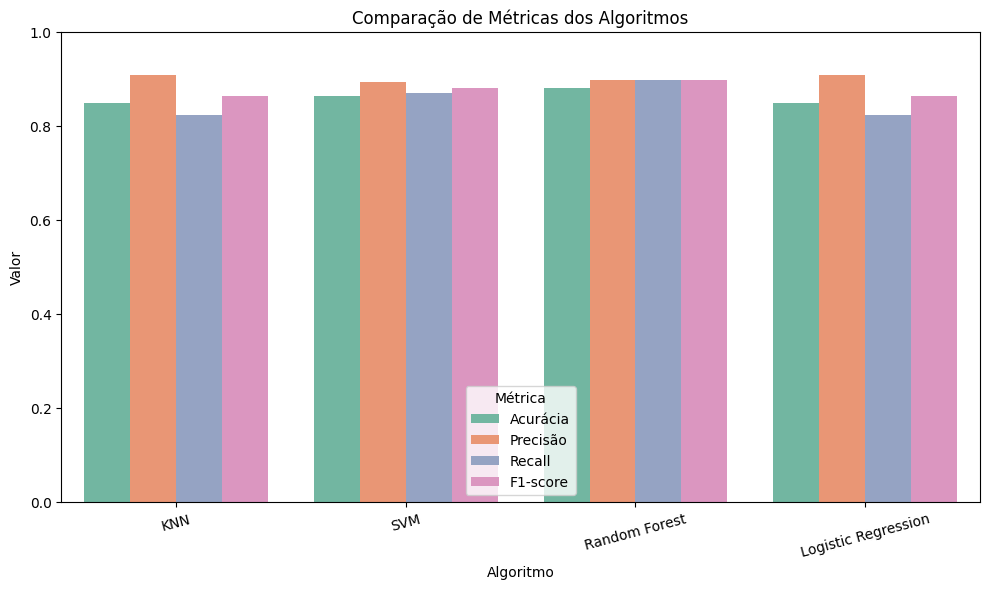

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df_results = pd.DataFrame(results).T
# Transforma para formato longo
df_long = df_results.reset_index().melt(id_vars='index', var_name='Métrica', value_name='Valor')
df_long = df_long.rename(columns={'index': 'Algoritmo'})

plt.figure(figsize=(10,6))
sns.barplot(data=df_long, x='Algoritmo', y='Valor', hue='Métrica', palette='Set2')
plt.title('Comparação de Métricas dos Algoritmos')
plt.ylabel('Valor')
plt.ylim(0,1)
plt.legend(title='Métrica')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()